In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import make_grid
from visualise import visualise_v_quiver

from configs import N_SIDE

# Import all function

In [2]:
# Import all simulation functions
from simulate import (
    simulate_detailed_convergence,
    simulate_detailed_deflection,
    simulate_detailed_curve,
    simulate_detailed_ridges,
    simulate_detailed_branching,
    simulate_detailed_edge
)

# Define simulations as a dictionary with names as keys to function objects
# Order matters
simulations = {
    "curve": simulate_detailed_curve,
    "deflection": simulate_detailed_deflection,
    "ridges": simulate_detailed_ridges,
    "branching": simulate_detailed_branching,
    "edge": simulate_detailed_edge,
}

In [3]:
#############
### TRAIN ###
#############

x_train = torch.load("data/sim_data/x_train_lines_discretised_0to1.pt", weights_only = False).float()

# Storage dictionaries
y_train_dict = {}

# Make y_train_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate training observations with sim_func
    y_train = sim_func(x_train)
    # Store training data in dictionary under sim_name
    y_train_dict[sim_name] = y_train 

############
### TEST ###
############

# Make x_grid
_, x_test = make_grid(n_side = N_SIDE)

# Storage dictionaries
y_test_dict = {}

# Make y_test_dict: Iterate over all simulation functions
for sim_name, sim_func in simulations.items():

    # Generate test observations
    y_test = sim_func(x_test)
    y_test_dict[sim_name] = y_test  # Store test outputs

# Load line segements

In [4]:
# Read line segements as pd.DataFrame
line_segments = pd.read_csv("data/line_segments_0to1.csv")
# print(line_segments)

# Convert line segments to torch tensor, ignoring the column headers
line_segments = torch.tensor(line_segments.values)
# print(line_segments)
# rightmost vertical line segment
print(line_segments[6])

tensor([0.6667, 0.8000, 0.0000, 1.0000], dtype=torch.float64)


# Plot train lines and ground truth test data

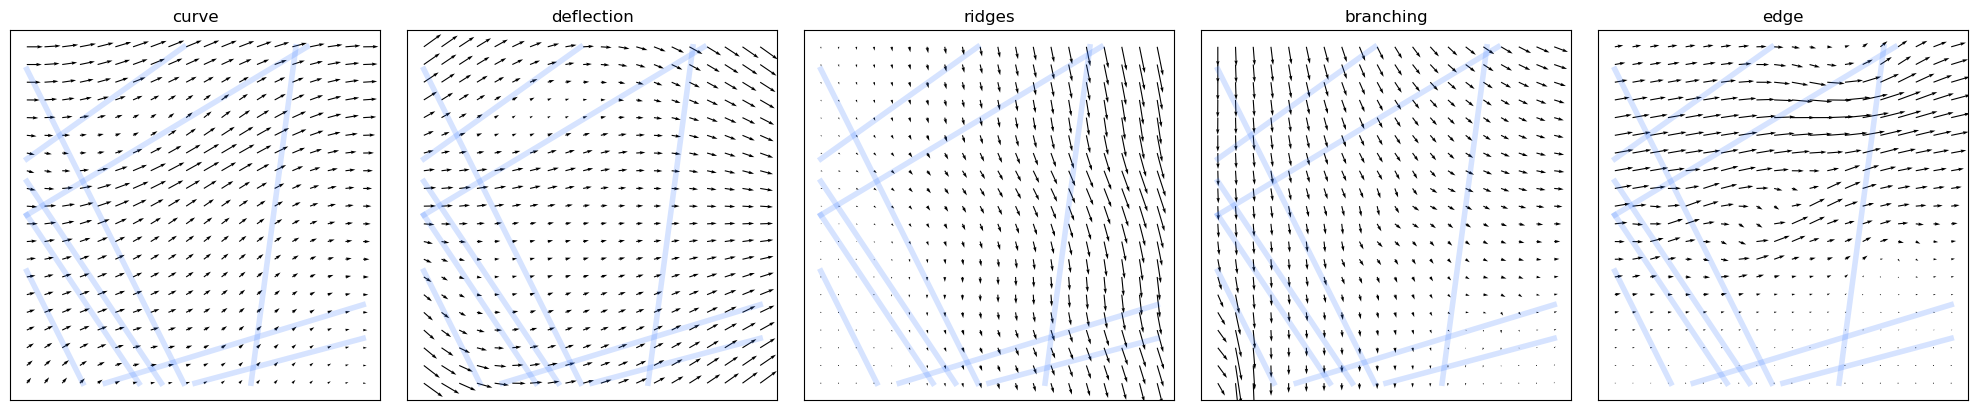

In [5]:
x_train = x_train.detach()
x_test = x_test.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

# Create figure with 5 subplots (one for each simulation)
fig, axes = plt.subplots(1, 5, figsize = (20, 4))

for ax, (sim_name, y_train) in zip(axes, y_train_dict.items()):

    # Extract training and test vectors
    y_test = y_test_dict[sim_name]
    
    # Iterate over (9) segements:
    for i in range(0, line_segments.shape[0]):
        ax.plot(
            [line_segments[i, 0], line_segments[i, 1]], # (x_start, x_end)
            [line_segments[i, 2], line_segments[i, 3]], # (y_start, y_end)
            color = train_line_color, alpha = 0.2, linewidth = 4)
    
    # Plot ground truth test data in black
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = test_color, label = "test")
    
    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")
    ax.set_title(sim_name)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

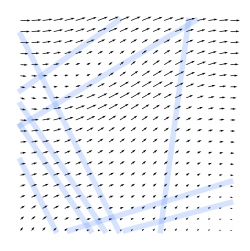

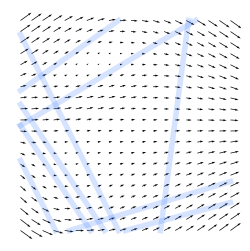

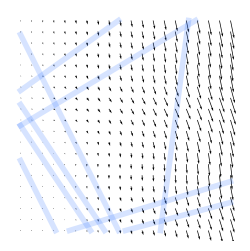

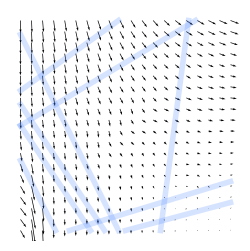

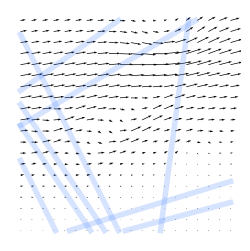

In [6]:
x_train = x_train.detach()
x_test = x_test.detach()

# Define colors
train_line_color = "#3377ff"  # Color for tranparent line to indicate training data
test_color = "black"  # Black for test data

for (sim_name, y_train) in y_train_dict.items():

    # Extract training and test vectors
    y_test = y_test_dict[sim_name]

    fig, ax = plt.subplots(1, 1, figsize = (3, 3))

    # Extract training and test vectors
    y_test = y_test_dict[sim_name]
    
    # Iterate over (9) segements:
    for i in range(0, line_segments.shape[0]):
        ax.plot(
            [line_segments[i, 0], line_segments[i, 1]], # (x_start, x_end)
            [line_segments[i, 2], line_segments[i, 3]], # (y_start, y_end)
            color = train_line_color, alpha = 0.2, linewidth = 4)
    
    # Plot ground truth test data in black
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = test_color, label = "test")

    # ax.set_xlim([0., 1.])
    # ax.set_ylim([0., 1.])

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_aspect("equal")

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig(f"figures/train_lines_test_quivers_no_border/{sim_name}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    plt.show()
    plt.close()

## Plot training points in one row

/tmp/ipykernel_1618149/532423237.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


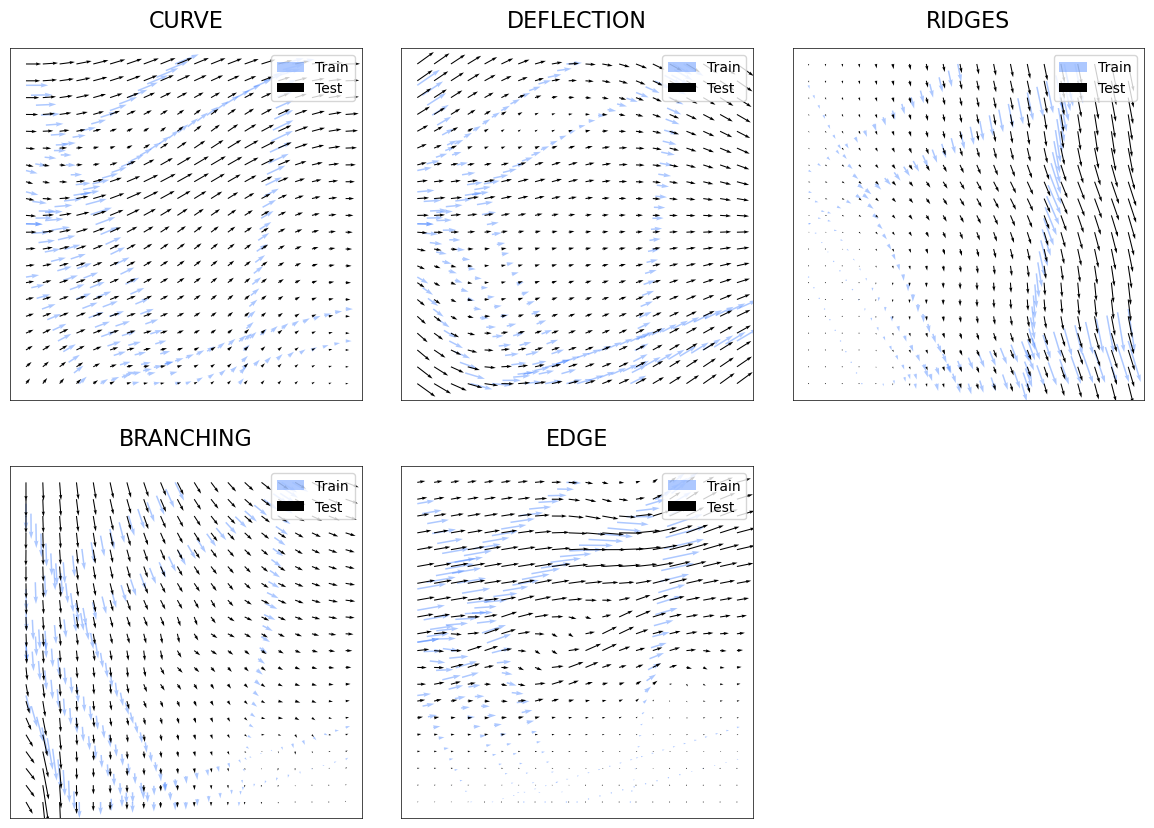

In [7]:
# Define colors
train_color = train_line_color  # Dark color for training data
test_color = "black"   # Darker grey for test data

# Create figure with 2 rows and 3 columns (one will be empty)
fig, axes = plt.subplots(2, 3, figsize = (15, 10), gridspec_kw = {'hspace': 0.19, 'wspace': 0.03}) 

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, (sim_name, y_train) in enumerate(y_train_dict.items()):
    ax = axes[i]  # Select the corresponding subplot
    
    # Extract training and test vectors
    y_test = y_test_dict[sim_name]
    
    # Plot training data in dark color
    ax.quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = train_color, alpha = 0.4, label = "Train")
    
    # Plot test data in darker grey
    ax.quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = test_color, label = "Test")
    
    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_aspect('equal')
    ax.legend()
    
    # Capitalized title with larger font size and extra padding
    ax.set_title(sim_name.upper(), fontsize = 16, pad = 15)

    # Thicker border
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color("black")

# Remove the unused subplot (6th subplot in 2x3 layout)
fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print mean vector magnitude of each simulation example

In [8]:
y_train_dict["curve"].mean()

for sim_name, y_train in y_train_dict.items():
    # Calculate the mean of the y_train tensor
    mean_y_train = y_train.norm(dim = 1).mean()
    print(f"Mean of {sim_name}: {mean_y_train}")

Mean of curve: 1.4136908054351807
Mean of deflection: 1.400264859199524
Mean of ridges: 1.073532223701477
Mean of branching: 0.7272323966026306
Mean of edge: 0.7080433964729309


In [9]:
y_train_dict["edge"].shape

print(y_train_dict["edge"].abs().mean(dim = 0), y_train_dict["edge"].abs().max())

tensor([0.6892, 0.1324]) tensor(2.0177)


In [10]:
std_independent_Gaussian_noise = 0.02 # variance is 0.0004
torch.randn(y_train_dict["curve"].shape) * std_independent_Gaussian_noise

tensor([[-1.7991e-03,  4.6601e-04],
        [ 7.4021e-03,  3.5451e-02],
        [-4.5517e-03,  2.4198e-02],
        [ 3.1084e-03, -8.1294e-03],
        [ 1.2994e-02, -6.0820e-03],
        [-1.0746e-02, -1.3244e-02],
        [-1.5882e-02, -2.2372e-03],
        [ 1.4811e-02, -5.7862e-03],
        [ 1.5271e-02,  1.9493e-02],
        [ 6.1621e-03,  2.7877e-02],
        [ 3.8244e-02, -1.0184e-02],
        [-8.3797e-03, -4.5935e-03],
        [-1.3414e-02,  2.8415e-04],
        [-1.2166e-02,  1.4840e-02],
        [ 2.9861e-02, -2.0342e-02],
        [ 1.4572e-03,  2.3533e-02],
        [ 1.0720e-02, -1.9083e-02],
        [-6.7082e-03,  4.2530e-03],
        [-1.9812e-02, -9.3335e-03],
        [ 7.9516e-03,  2.4276e-02],
        [-3.1852e-03,  4.3182e-03],
        [ 1.7817e-02,  3.9464e-03],
        [-1.0869e-02, -1.0505e-03],
        [ 1.9769e-02, -3.8579e-03],
        [ 2.1100e-02, -1.9094e-02],
        [ 1.6542e-02, -7.1885e-03],
        [-1.9565e-02, -4.2369e-02],
        [ 5.8133e-03,  2.404

# Plots suitable for dfNN

In [11]:
model_name = "dfGP"
results_dir = "results/"

sim_name = "curve_dtl"
path = "results/" + model_name + "/" + sim_name + "_dfGP_test_mean_predictions.pt"

y_test = y_test_dict["curve"].detach().cpu()

pred_curve_dtl = torch.load(path).detach().cpu()

error = torch.abs(pred_curve_dtl - y_test)

/tmp/ipykernel_1618149/3672649011.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pred_curve_dtl = torch.load(path).detach().cpu()


FileNotFoundError: [Errno 2] No such file or directory: 'results/dfGP/curve_dtl_dfGP_test_mean_predictions.pt'

# Custom cmap

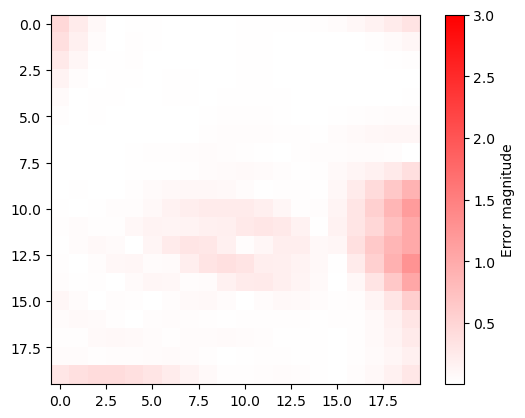

In [ ]:
import matplotlib

values = np.array([0., 1.])
colors = ["white", "red"]
white_to_red_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "white_to_red", colors = list(zip(values, colors)))

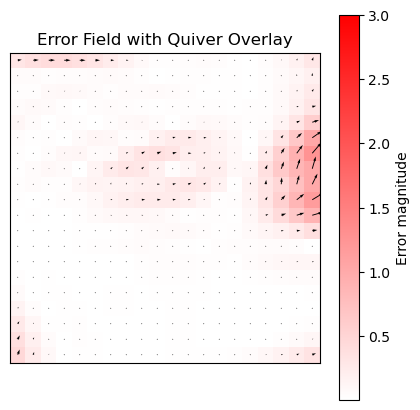

In [ ]:
# Reshape to 2D
error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE).numpy()

U = error[:, 0].reshape(N_SIDE, N_SIDE).numpy()  # x-component
V = error[:, 1].reshape(N_SIDE, N_SIDE).numpy()  # y-component

X = x_test[:, 0].reshape(N_SIDE, N_SIDE)
Y = x_test[:, 1].reshape(N_SIDE, N_SIDE)

# Plot
plt.figure(figsize = (5, 5))
pc = plt.pcolor(X, Y, error_magnitude, cmap = white_to_red_cmap, shading = "auto", vmax = 3.0)
plt.quiver(X, Y, U, V, scale = 20, color = "black")
plt.colorbar(pc, label = "Error magnitude")
plt.title("Error Field with Quiver Overlay")

plt.gca().set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.show()

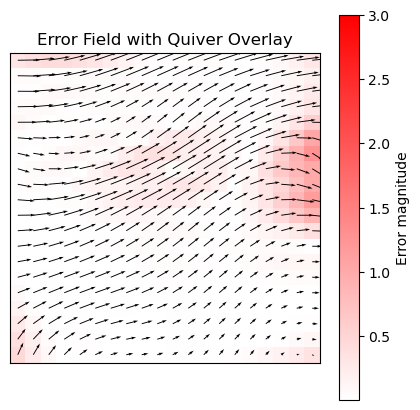

In [ ]:
# Reshape to 2D

error_magnitude = error.sum(dim = -1).reshape(N_SIDE, N_SIDE).numpy()

X = x_test[:, 0].reshape(N_SIDE, N_SIDE)
Y = x_test[:, 1].reshape(N_SIDE, N_SIDE)

U = pred_curve_dtl[:, 0].reshape(N_SIDE, N_SIDE)
V = pred_curve_dtl[:, 1].reshape(N_SIDE, N_SIDE)

# Plot
plt.figure(figsize = (5, 5))
pc = plt.pcolor(X, Y, error_magnitude, cmap = white_to_red_cmap, shading = "auto", vmax = 3.0)
plt.quiver(X, Y, U, V, color = "black", scale = 30, )
plt.colorbar(pc, label = "Error magnitude")
plt.title("Error Field with Quiver Overlay")

plt.gca().set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.show()

In [ ]:
model_name = "dfNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfNN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "dfNN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfNN_test_predictions.pt"
    pred = torch.load(path) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# PINN

- plot both loss components

In [ ]:
model_name = "PINN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_PINN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss (RMSE)", color = "red")
    # Scale it?
    # plt.plot(losses["Epoch"], losses["Test Loss"] * 0.3, label = "Test Loss", color = "pink")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss (RMSE)", color = "blue")
    plt.plot(losses["Epoch"], losses["Train Loss"], label = "Train Loss mean(RMSE + div)", color = "lightblue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "PINN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_PINN_test_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# dfGP

### Plot NLML loss (which we minimize)

In [13]:
simulations = {
    "convergence_dtl": simulate_detailed_convergence,
    "deflection_dtl": simulate_detailed_deflection,
    "curve_dtl": simulate_detailed_curve,
    "ridges_dtl": simulate_detailed_ridges,
    "branching_dtl": simulate_detailed_branching,
}

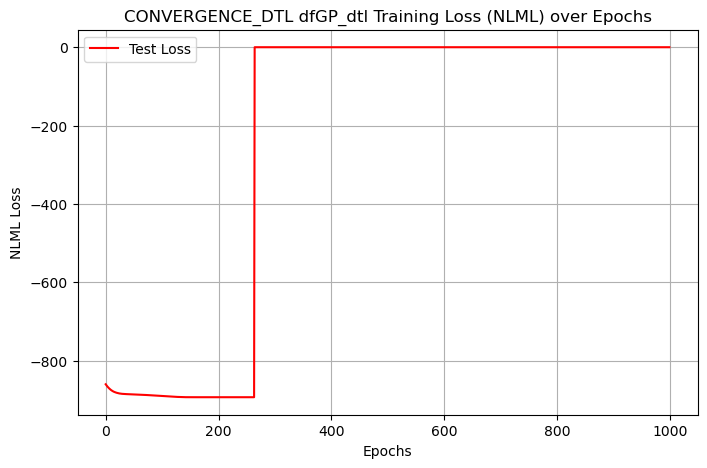

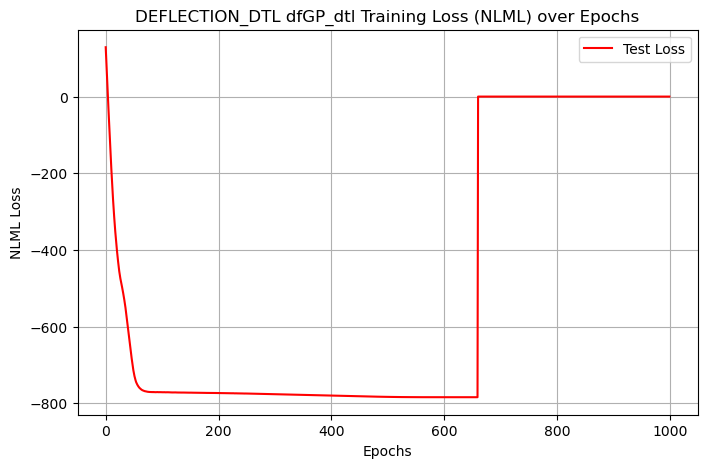

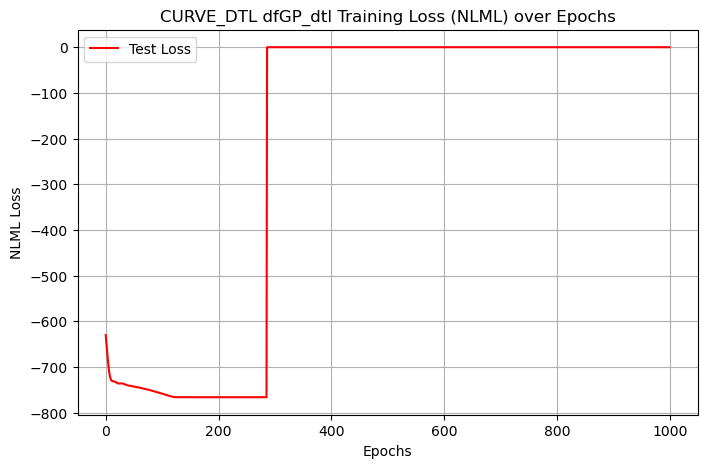

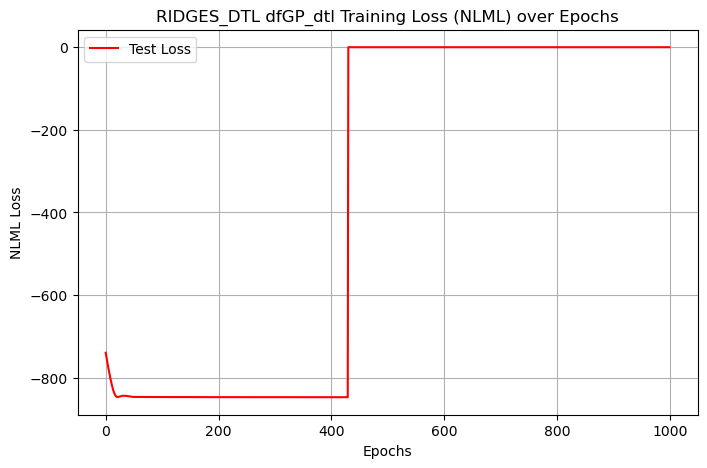

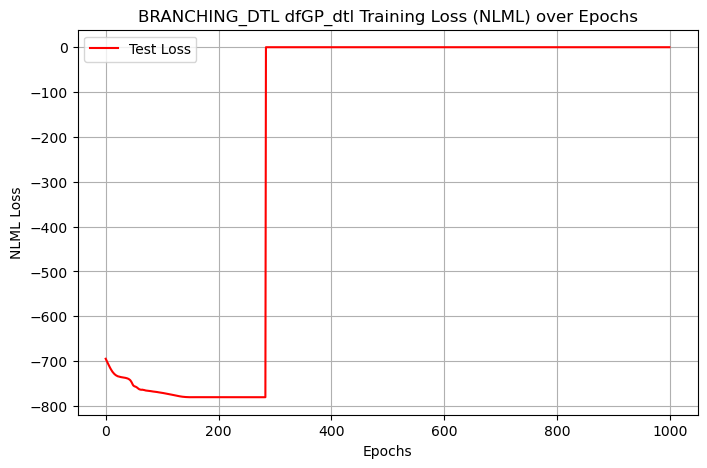

In [14]:
model_name = "dfGP_dtl"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

## Plot RMSE

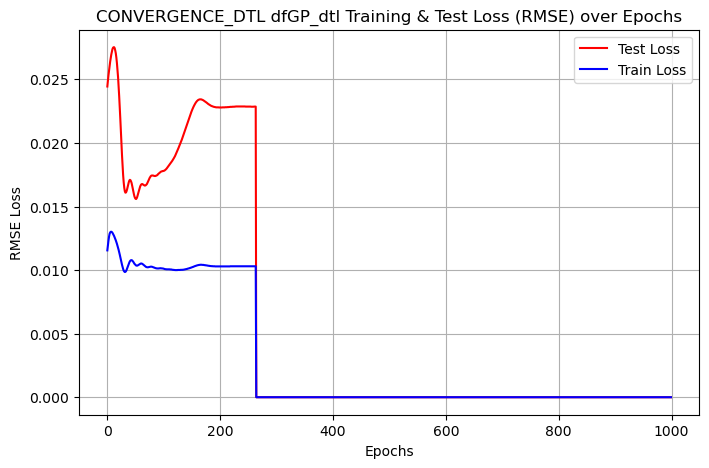

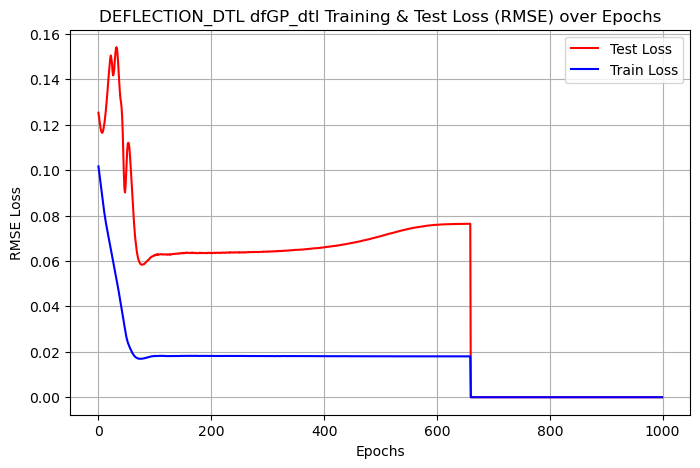

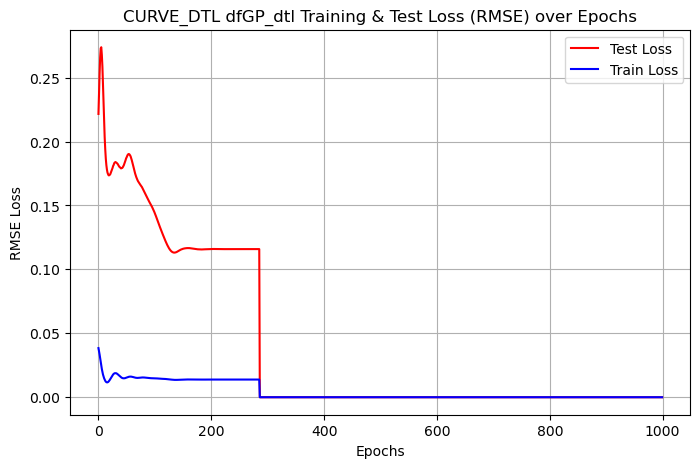

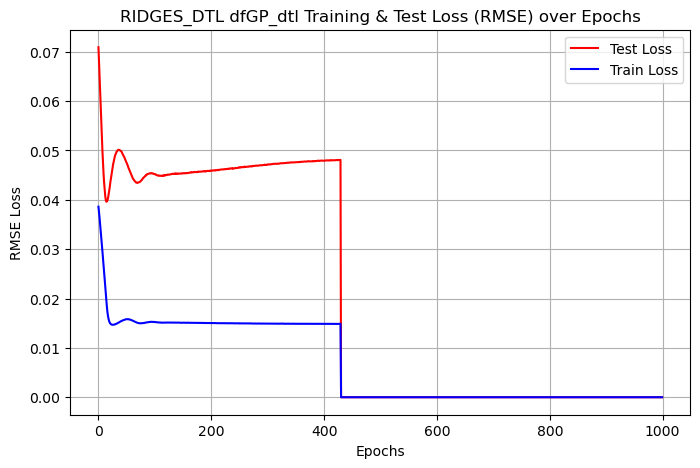

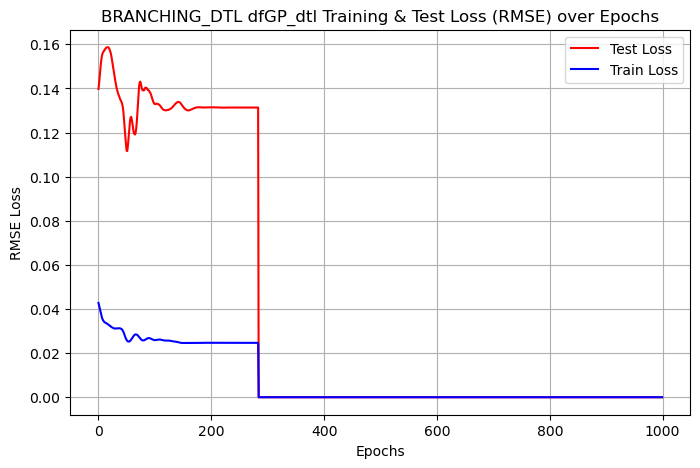

In [16]:
model_name = "dfGP_dtl"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

## Plot hypers

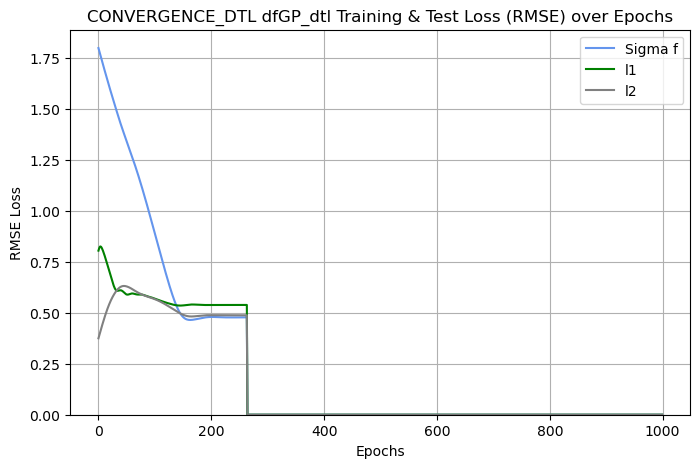

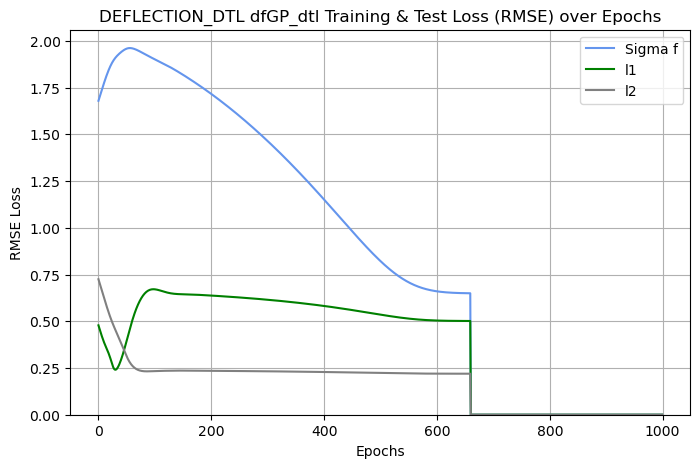

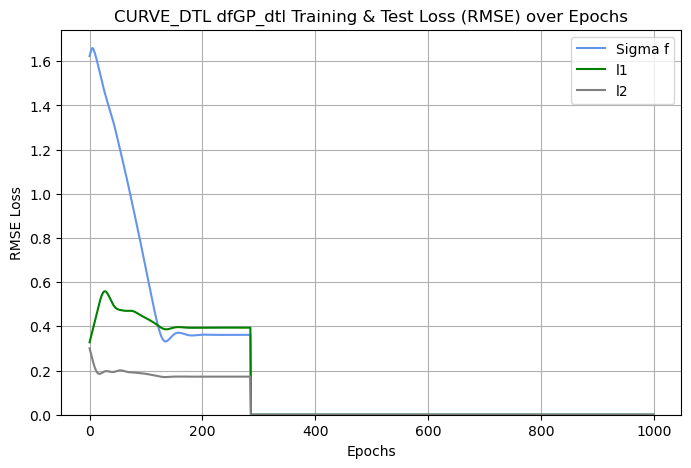

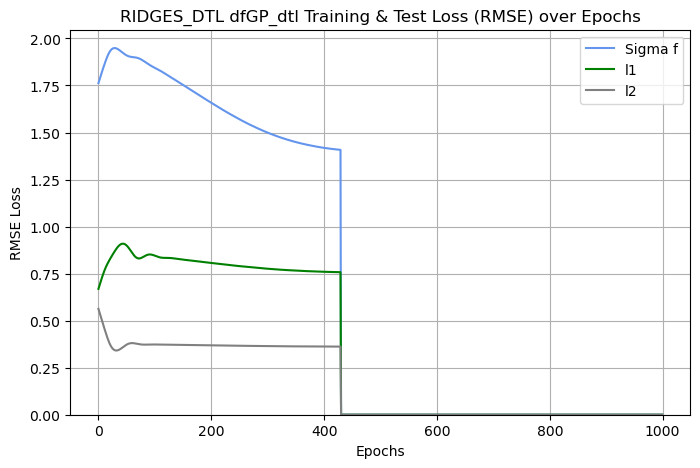

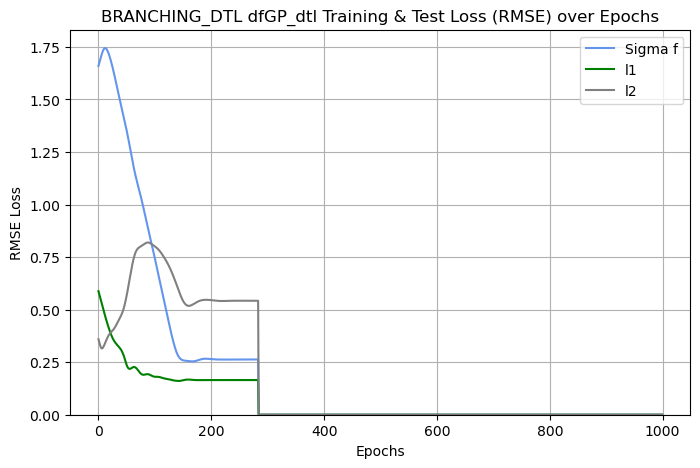

In [17]:
model_name = "dfGP_dtl"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "cornflowerblue")
    plt.plot(losses["Epoch"], losses["l1"], label = "l1", color = "green")
    plt.plot(losses["Epoch"], losses["l2"], label = "l2", color = "grey")
    plt.ylim(0, None) # here we fix y_min to zero
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [18]:
print(losses)

     Epoch  Train Loss NLML  Train Loss RMSE  Test Loss RMSE  Sigma_f  \
0        0       -694.64136          0.04275         0.13977  1.65955   
1        1       -697.20074          0.04175         0.14195  1.66937   
2        2       -699.77710          0.04064         0.14461  1.67917   
3        3       -702.66205          0.03951         0.14757  1.68891   
4        4       -705.53375          0.03833         0.15058  1.69847   
..     ...              ...              ...             ...      ...   
995    995          0.00000          0.00000         0.00000  0.00000   
996    996          0.00000          0.00000         0.00000  0.00000   
997    997          0.00000          0.00000         0.00000  0.00000   
998    998          0.00000          0.00000         0.00000  0.00000   
999    999          0.00000          0.00000         0.00000  0.00000   

          l1       l2  
0    0.58768  0.35917  
1    0.57761  0.34919  
2    0.56753  0.33935  
3    0.55743  0.32988  
4  

In [ ]:
model_name = "dfGP"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfGP_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# GP

In [ ]:
model_name = "GP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_GP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

In [ ]:
model_name = "GP"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_GP_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

In [ ]:
model_name = "GP"
for sim_name, _ in simulations.items():
    path_mean = "results/" + model_name + "/" + sim_name + "_GP_test_mean_predictions.pt"
    path_covar = "results/" + model_name + "/" + sim_name + "_GP_test_covar_predictions.pt"
    mean = torch.load(path_mean, weights_only = False) # tensor
    covar = torch.load(path_covar, weights_only = False) # tensor
    break

In [ ]:
from utils import sample_posterior

samples = sample_posterior(mean, covar, n_samples = 10)

visualise_v_quiver(samples[9], x_test, title_string = "GP Predictive Samples")

# dfGP dfNN

In [ ]:
model_name = "dfGPdfNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_" + "dfGPdfNN" + "_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

In [ ]:
model_name = "dfGPdfNN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_" + "dfGPdfNN" + "_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

In [ ]:
model_name = "dfGPdfNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_" + "dfGPdfNN" + "_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "cornflowerblue")
    plt.plot(losses["Epoch"], losses["l1"], label = "l1", color = "green")
    plt.plot(losses["Epoch"], losses["l2"], label = "l2", color = "grey")
    plt.ylim(0, None) # here we fix y_min to zero
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()